In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [175]:
import warnings
warnings.filterwarnings('ignore')

In [95]:
df=pd.read_csv("MonthWiseMarketArrivals.csv")
df["date"]=pd.to_datetime(df['date'],format="%B-%Y")

In [96]:
df["market"].value_counts()

LASALGAON(MS)         242
PIMPALGAON(MS)        224
MANMAD(MS)            218
LONAND(MS)            211
MAHUVA(GUJ)           210
                     ... 
RAJAHMUNDRY(AP)         1
SRIGANGANAGAR(RAJ)      1
MEERUT(UP)              1
CHALLAKERE(KNT)         1
NEEMUCH(MP)             1
Name: market, Length: 120, dtype: int64

In [97]:
df.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [98]:
df.duplicated().sum()

0

In [99]:
k=[]
a=[]
n=[]
b=""
for i in df["market"]:
    a=i.split("(")
    if len(a)==2:
        b=a[1][:2]
        k.append(b)
    else :
        k.append("Unknown")
        n.append("Unknown")
        


In [100]:
len(k)

10227

In [101]:
df.shape

(10227, 10)

In [102]:
len(n)

2022

In [103]:
df["state"].value_counts()

MS     4354
KNT     958
GUJ     929
UP      617
PB      593
RAJ     462
TN      350
MP      309
AP      278
HR      233
WB      187
JK      163
DEL     158
BHR     140
ASM     134
OR      129
JH      123
KEL      55
HP       40
KER      13
CH        2
Name: state, dtype: int64

In [104]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


In [105]:
state_wise=df.groupby("state")

In [106]:
ms=state_wise.get_group("MS")

In [107]:
ms.shape

(4354, 10)

In [113]:
ms.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
348,AHMEDNAGAR(MS),January,2002,14118,93,305,212,MS,AHMEDNAGAR,2002-01-01
349,AHMEDNAGAR(MS),January,2004,30981,307,930,618,MS,AHMEDNAGAR,2004-01-01
350,AHMEDNAGAR(MS),January,2005,58100,96,438,266,MS,AHMEDNAGAR,2005-01-01
351,AHMEDNAGAR(MS),January,2006,72382,68,458,261,MS,AHMEDNAGAR,2006-01-01
352,AHMEDNAGAR(MS),January,2007,105069,267,1321,795,MS,AHMEDNAGAR,2007-01-01


In [108]:
ms["date"].duplicated().sum()

4112

In [120]:
ms.groupby("date")[["month","priceMod"]].mean()

,priceMod
date,
1996-01-01,226.000000
1996-02-01,186.000000
1996-03-01,243.000000
1996-04-01,254.000000
1996-05-01,269.000000
...,...
2015-10-01,2809.322581
2015-11-01,1930.806452
2015-12-01,1250.705882


In [109]:
df2=ms.groupby("date")[["priceMod"]].mean()

In [110]:
df2.shape

(242, 1)

In [111]:
df2.reset_index(inplace=True)

In [112]:
df2.head(5)

,date,priceMod
0,1996-01-01,226.0
1,1996-02-01,186.0
2,1996-03-01,243.0
3,1996-04-01,254.0
4,1996-05-01,269.0


In [90]:
print(df2["date"].min())
print(df2["date"].max())

1996-01-01 00:00:00
2016-02-01 00:00:00


In [114]:
d1 = pd.date_range(start="1996-01-01",end="2016-02-01", freq='MS') # Y = Year Start 
print(d1.shape)

(242,)


In [115]:
print(len(set(d1).intersection(set(df2['date']))))
print(len(set(d1).difference(set(df2['date']))))

242
0


In [117]:
df2.head()

,date,priceMod
0,1996-01-01,226.0
1,1996-02-01,186.0
2,1996-03-01,243.0
3,1996-04-01,254.0
4,1996-05-01,269.0


In [121]:
pt1 = pd.pivot_table(data=ms,columns=['year'],index=['month'],values=['priceMod'])
pt1

priceMod                                                           \
year          1996    1997         1998        1999        2000        2001   
month                                                                         
April        254.0  214.00   239.625000  345.777778  189.777778  247.777778   
August       340.0  195.00  1319.500000  396.111111  252.222222  520.222222   
December     385.0  688.75  1055.166667  302.888889  517.444444  406.900000   
February     186.0  271.00   822.000000  278.666667  216.000000  336.111111   
January      226.0  290.00  1049.571429  494.714286  227.333333  480.777778   
July         368.0  148.20   838.875000  424.555556  198.555556  344.777778   
June         367.0  195.00   583.000000  427.555556  181.000000  286.444444   
March        243.0  273.00   396.375000  241.888889  209.222222  307.666667   
May          269.0  213.00   312.750000  464.888889  188.555556  210.555556   
November     376.0  617.40  1443.000000  439.888889  582.111111  722.111111   
October      492.0  322.00  2289.000000  554.444444  427.888889  518.666667   
September    317.0  240.60  1772.375000  605.000000  301.222222  479.300000   

                                                            ...               \
year             2002        2003        2004         2005  ...         2007   
month                                                       ...                
April      166.071429  271.538462  289.450000   252.304348  ...   438.592593   
August     430.142857  463.692308  367.900000   588.833333  ...  1091.925926   
December   253.666667  635.923077  336.500000   525.434783  ...   479.800000   
February   202.538462  154.071429  657.176471   256.333333  ...   898.814815   
January    242.714286  176.454545  726.150000   286.565217  ...   829.551724   
July       337.071429  426.153846  348.789474   353.800000  ...   800.230769   
June       275.285714  415.000000  353.052632   298.521739  ...   763.923077   
March      179.833333  214.076923  383.578947   225.260870  ...   598.821429   
May        178.357143  293.846154  296.210526   234.333333  ...   470.423077   
November   390.538462  576.384615  380.736842  1006.782609  ...   731.880000   
October    547.142857  710.076923  452.789474  1023.708333  ...  1239.692308   
September  440.785714  506.214286  366.050000   799.750000  ...  1295.535714   

                                                                           \
year             2008         2009         2010         2011         2012   
month                                                                       
April      268.086957   452.461538   489.535714   490.884615   400.040000   
August     730.470588   622.500000   796.269231  1002.720000   599.913043   
December   990.285714  1337.740741  2391.428571   560.346154  1149.909091   
February   265.148148   979.851852   930.222222   854.583333   343.913043   
January    282.148148  1129.200000  1184.392857  2418.000000   386.961538   
July       575.640000   593.480000   623.333333   781.640000   542.208333   
June       354.160000   621.615385   586.925926   672.920000   452.500000   
March      292.708333   654.692308   585.925926   456.538462   353.409091   
May        230.920000   455.230769   506.500000   503.615385   364.200000   
November   897.458333  1412.740741  1735.653846   775.958333   993.583333   
October    593.727273  1270.571429  1333.230769   837.769231   792.500000   
September  589.181818   622.464286  1221.814815   987.038462   523.760000   

                                                               
year              2013         2014         2015         2016  
month                                                          
April       785.500000   721.000000   964.214286          NaN  
August     3384.000000  1515.090909  4055.000000          NaN  
December   1333.350000  1396.433333  1250.705882          NaN  
February   1339.041667   612.888889  1324.433333   799.166667  
January    1328.181

In [122]:
plot_data = pt1.iloc[:,16:20]
plot_data

priceMod                                       
year              2012         2013         2014         2015
month                                                        
April       400.040000   785.500000   721.000000   964.214286
August      599.913043  3384.000000  1515.090909  4055.000000
December   1149.909091  1333.350000  1396.433333  1250.705882
February    343.913043  1339.041667   612.888889  1324.433333
January     386.961538  1328.181818   872.842105  1152.785714
July        542.208333  1981.130435  1701.578947  1966.100000
June        452.500000  1291.041667  1217.250000  1501.482759
March       353.409091   921.136364   712.166667  1089.458333
May         364.200000   876.130435   796.055556  1160.714286
November    993.583333  2581.736842  1354.240000  1930.806452
October     792.500000  3589.090909  1355.954545  2809.322581
September   523.760000  4039.809524  1316.347826  3965.441176

In [123]:
cols = [i[1] for i in plot_data.columns]
cols

[2012, 2013, 2014, 2015]

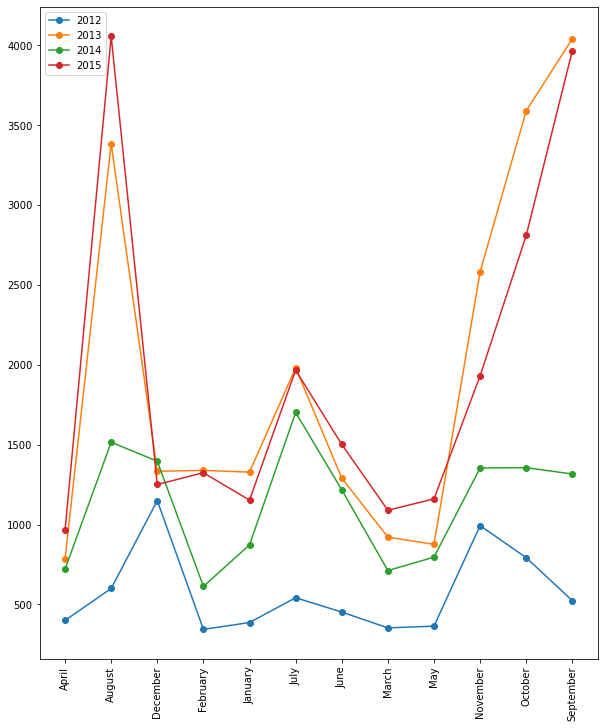

In [125]:
plt.figure(figsize=(10,12))
plt.plot(plot_data,label=cols,marker='o')
plt.xticks(rotation="vertical")
plt.legend()

plt.show()

In [134]:
df2.head()

,date,priceMod
0,1996-01-01,226.0
1,1996-02-01,186.0
2,1996-03-01,243.0
3,1996-04-01,254.0
4,1996-05-01,269.0


In [136]:
df2=df2.set_index("date")

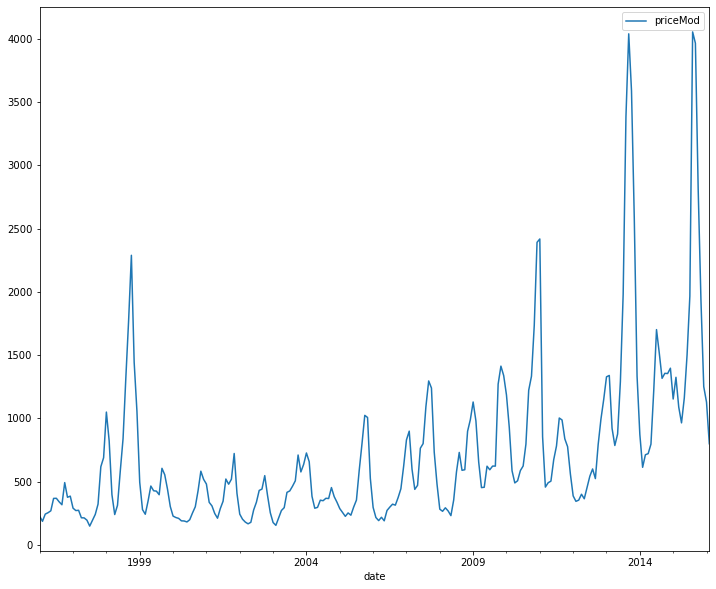

In [137]:
df2.plot(figsize=(12,10))
plt.show()

In [179]:
def eval_model(test,pred,model_name):
    mae = mean_absolute_error(test,pred)
    mse = mean_squared_error(test,pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(test,pred)
    res = pd.DataFrame({'MAE':mae,'MSE':mse,'RMSE':rmse,'MAPE':mape},index=[model_name])
    return res

def plot_res(train,test,fcast):
    plt.plot(train,label='Train')
    plt.plot(test,label='Test')
    plt.plot(fcast,label='Forecast')
    plt.legend()
    plt.show()

In [180]:
from statsmodels.tsa.seasonal import seasonal_decompose

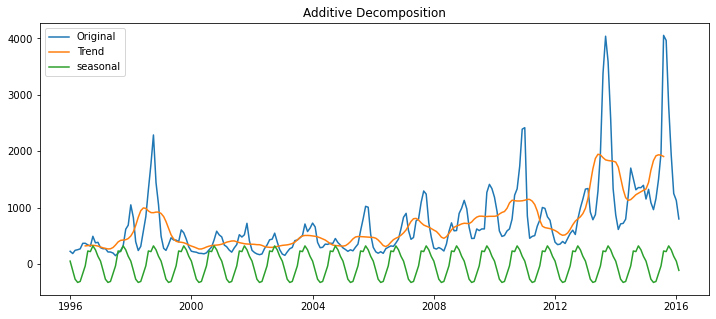

In [181]:
decom_add = seasonal_decompose(df2,model='additive')

original = decom_add.observed
trend = decom_add.trend
seasonal = decom_add.seasonal

plt.figure(figsize=(12,5))
plt.plot(original,label='Original')
plt.plot(trend,label='Trend')
plt.plot(seasonal,label='seasonal')
plt.title('Additive Decomposition')
plt.legend()
plt.show()

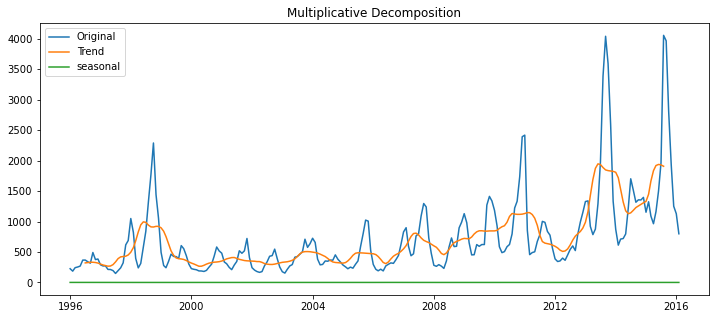

In [182]:
decom_mul = seasonal_decompose(df2,model='mul')

original = decom_mul.observed
trend = decom_mul.trend
seasonal = decom_mul.seasonal

plt.figure(figsize=(12,5))
plt.plot(original,label='Original')
plt.plot(trend,label='Trend')
plt.plot(seasonal,label='seasonal')
plt.title('Multiplicative Decomposition')
plt.legend()
plt.show()

In [195]:
df2.shape

(242, 1)

In [196]:
train = df2.iloc[:172]
test = df2.iloc[172:]
print(train.shape)
print(test.shape)

(172, 1)
(70, 1)


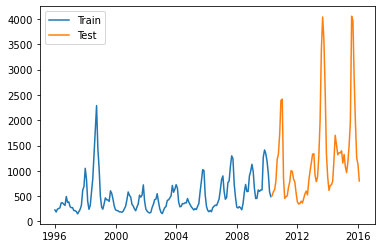

In [197]:
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.legend()
plt.show()

In [138]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [141]:
def adf_test(data):
    res = adfuller(data)
    print('Test_Stat',res[0])
    print('p',res[1])
    if res[1] > 0.05:
        print('Ho accepted : Data is not Stationary')
    else:
        print('H1 accepted : Data is Stationary')

In [142]:
adf_test(df2)

Test_Stat -1.7678022669364761
p 0.3965600273537905
Ho accepted : Data is not Stationary


In [159]:
df3=df2.copy()
df4=df2.copy()

In [147]:
df3["lag1"]=df3["priceMod"].shift(1)
df3["lag2"]=df3["priceMod"].shift(2)
df3["Diff"]=df3["priceMod"].diff(1)
df3["Diff_Diff"]=df3["priceMod"].diff().diff()

In [ ]:
# d4['Lag1'] = d4['priceMod'].shift(1)
# d4['Lag2'] = d4['priceMod'].shift(2)
# d4['Diff1'] = d4['priceMod'].diff(1)       # OR  d4['Value'] - d4['Lag1']
# d4['Diff2'] = d4['priceMod'] - d4['Lag2']  # OR d4['Value'].diff(2) 
# d4['Diff1_Lag1'] = d4['priceMod'].diff().shift(1)   
# d4['Diff_Diff'] = d4['priceMod'].diff().diff()   
# d4.head(8)

In [149]:
adf_test(df3["lag1"].dropna())

Test_Stat -2.61524171176443
p 0.08988785486311252
Ho accepted : Data is not Stationary


In [150]:
adf_test(df3["lag2"].dropna())

Test_Stat -2.8104994221120942
p 0.05678958118441623
Ho accepted : Data is not Stationary


In [151]:
adf_test(df3["Diff"].dropna())

Test_Stat -5.341579692288828
p 4.48801786406739e-06
H1 accepted : Data is Stationary


In [152]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\stats

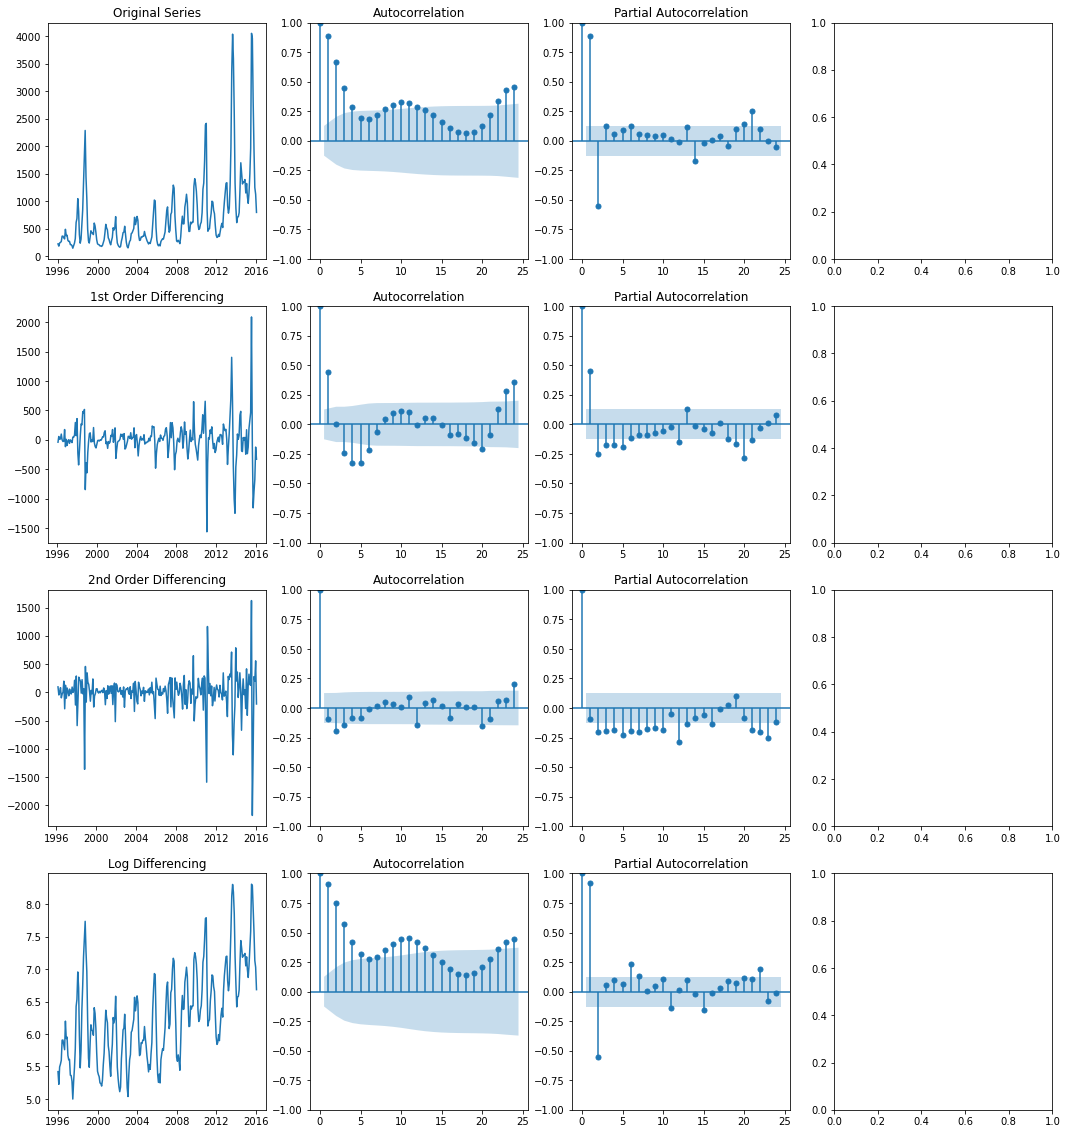

In [162]:
fig, axes = plt.subplots(4,4,figsize=(18,20))

# Original Data
axes[0,0].plot(df3)
axes[0,0].set_title('Original Series')
plot_acf(df4,ax=axes[0,1])
plot_pacf(df4,ax=axes[0,2])

# 1st differencing
axes[1,0].plot(df3.diff(1))
axes[1,0].set_title('1st Order Differencing')
plot_acf(df3.diff(1).dropna(),ax=axes[1,1])
plot_pacf(df3.diff(1).dropna(),ax=axes[1,2])

# 2nd differencing
axes[2,0].plot(df3.diff().diff())
axes[2,0].set_title('2nd Order Differencing')
plot_acf(df3.diff().diff().dropna(),ax=axes[2,1])
plot_pacf(df3.diff().diff().dropna(),ax=axes[2,2])

# log
axes[3,0].plot(np.log(df3))
axes[3,0].set_title('Log Differencing')
plot_acf(np.log(df4),ax=axes[3,1])
plot_pacf(np.log(df4),ax=axes[3,2])

plt.show()

### using 1st order differencing

In [186]:
df5=df2.copy()
df6=df2.copy()

In [187]:
df5["Stationary"]=df5["priceMod"].diff(1)
df6["priceMod"]=df6["priceMod"].diff(1).dropna()

In [167]:
df5.shape

(242, 2)

In [168]:
train = df5["Stationary"].iloc[:170]
test = df5["Stationary"].iloc[170:]
print(train.shape)
print(test.shape)

(170,)
(72,)


In [169]:
plist = list(range(1,9)) # 8
dlist = [1,2]            # 2
qlist = list(range(1,9)) # 8
print(8*2*8)

128


In [176]:
min_mse_arima = 99999999999999999999
pv = dv = qv = 0
c = 0
for i in plist:
    for j in dlist:
        for k in qlist:
            model = ARIMA(train,order=(i,j,k))
            model_fit = model.fit()
            fcast = model_fit.forecast(len(test))
            mse = mean_squared_error(test,fcast)
            rmse = np.sqrt(mse)
            mean_per_err=mean_absolute_percentage_error(test,fcast)
            c += 1
            print(f'For Iteration {c},p={i},d={j},q={k},MSE={mse},rmse={rmse},mean_per_err={mean_per_err}')
            if mse <= min_mse_arima:
                min_mse_arima = mse
                pv = i
                dv = j
                qv = k 

For Iteration 1,p=1,d=1,q=1,MSE=254049.65776644472,rmse=504.03338953530124,mean_per_err=1.0061899023001075
For Iteration 2,p=1,d=1,q=2,MSE=254058.4688335864,rmse=504.04213001849996,mean_per_err=1.0019209525014503
For Iteration 3,p=1,d=1,q=3,MSE=254048.1198605861,rmse=504.03186393380537,mean_per_err=0.9808932601127702
For Iteration 4,p=1,d=1,q=4,MSE=253844.55144674715,rmse=503.82988343958635,mean_per_err=1.0239418422033941
For Iteration 5,p=1,d=1,q=5,MSE=253959.20386206347,rmse=503.9436514751064,mean_per_err=1.0136080982207645
For Iteration 6,p=1,d=1,q=6,MSE=254458.7823777741,rmse=504.43907697339836,mean_per_err=0.9794960990556457
For Iteration 7,p=1,d=1,q=7,MSE=253745.93008849837,rmse=503.73200224772137,mean_per_err=0.9628495869738446
For Iteration 8,p=1,d=1,q=8,MSE=253757.8012172597,rmse=503.7437852889698,mean_per_err=0.9718893735531289
For Iteration 9,p=1,d=2,q=1,MSE=332939.1491655815,rmse=577.0087947038429,mean_per_err=6.729035596916135
For Iteration 10,p=1,d=2,q=2,MSE=253807.864604

For Iteration 78,p=5,d=2,q=6,MSE=312579.7773129574,rmse=559.0883448194546,mean_per_err=5.828931003450003
For Iteration 79,p=5,d=2,q=7,MSE=258057.7483080253,rmse=507.99384672260084,mean_per_err=1.2709682423159117
For Iteration 80,p=5,d=2,q=8,MSE=254378.80431034396,rmse=504.35979648495373,mean_per_err=1.01415749689716
For Iteration 81,p=6,d=1,q=1,MSE=254264.97587581052,rmse=504.24693938169867,mean_per_err=1.0189538793621626
For Iteration 82,p=6,d=1,q=2,MSE=252469.77865824755,rmse=502.4637087972101,mean_per_err=0.9720185718390434
For Iteration 83,p=6,d=1,q=3,MSE=252711.67682770453,rmse=502.7043632471321,mean_per_err=0.9822182432013895
For Iteration 84,p=6,d=1,q=4,MSE=254692.32365751266,rmse=504.67050999390943,mean_per_err=1.1876536874194321
For Iteration 85,p=6,d=1,q=5,MSE=251933.2677314215,rmse=501.9295445891002,mean_per_err=0.9700001739039743
For Iteration 86,p=6,d=1,q=6,MSE=253039.77294813877,rmse=503.030588481594,mean_per_err=1.0654056289261336
For Iteration 87,p=6,d=1,q=7,MSE=251209.

LinAlgError: LU decomposition error.

In [178]:
df5.head(30)

,priceMod,Stationary
date,,
1996-01-01,226.000000,NaN
1996-02-01,186.000000,-40.000000
1996-03-01,243.000000,57.000000
1996-04-01,254.000000,11.000000
1996-05-01,269.000000,15.000000
1996-06-01,367.000000,98.000000
1996-07-01,368.000000,1.000000
1996-08-01,340.000000,-28.000000
1996-09-01,317.000000,-23.000000
